In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df= pd.read_csv("accidents_2012_to_2014.csv")


C:\Users\user\AppData\Local\Temp\ipykernel_8352\9058062.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("accidents_2012_to_2014.csv")


In [3]:
df = df.drop(columns=[
    'Accident_Index',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Junction_Detail',
    'LSOA_of_Accident_Location',
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    '1st_Road_Class',
    '1st_Road_Number',
    '2nd_Road_Class',
    '2nd_Road_Number',
    'Junction_Control',
    'Latitude',
    'Police_Force',
    'Time',
    'Date'
])

In [4]:

df

,Longitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),Road_Type,Speed_limit,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.169101,3,2,1,5,12,E09000020,Single carriageway,30,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,-0.200838,3,2,1,4,1,E09000033,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,-0.188636,3,2,1,3,12,E09000020,One way street,30,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,-0.200259,3,1,1,4,12,E09000020,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,-0.183773,3,1,1,3,12,E09000020,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,-3.417278,2,2,1,1,917,S12000006,Dual carriageway,70,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,2,Yes,2014
464693,-3.230255,3,2,2,5,917,S12000006,Dual carriageway,70,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,2,Yes,2014
464694,-3.230826,3,1,1,3,917,S12000006,Single carriageway,40,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,Yes,2014
464695,-3.191397,2,3,2,4,917,S12000006,Single carriageway,60,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes,2014


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,464697.0,-1.375156,1.382137,-7.509162,-2.315799,-1.323374,-0.192935,1.759382
Accident_Severity,464697.0,2.833461,0.402029,1.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,464697.0,1.828086,0.708703,1.000000,1.000000,2.000000,2.000000,67.000000
Number_of_Casualties,464697.0,1.334420,0.821047,1.000000,1.000000,1.000000,1.000000,93.000000
Day_of_Week,464697.0,4.108740,1.916429,1.000000,2.000000,4.000000,6.000000,7.000000
Local_Authority_(District),464697.0,329.123829,259.222621,1.000000,95.000000,300.000000,511.000000,941.000000
Speed_limit,464697.0,38.229793,13.800546,10.000000,30.000000,30.000000,40.000000,70.000000
Urban_or_Rural_Area,464697.0,1.337426,0.472832,1.000000,1.000000,1.000000,2.000000,2.000000
Year,464697.0,2012.928140,0.834536,2012.000000,2012.000000,2013.000000,2014.000000,2014.000000


In [6]:
df.isnull().value_counts()

Longitude  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  Day_of_Week  Local_Authority_(District)  Local_Authority_(Highway)  Road_Type  Speed_limit  Pedestrian_Crossing-Human_Control  Pedestrian_Crossing-Physical_Facilities  Light_Conditions  Weather_Conditions  Road_Surface_Conditions  Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  Year 
False      False              False               False                 False        False                       False                      False      False        False                              False                                    False             False               False                    False                False                                        False    463941
                                                                                                                                                                                                                                                

In [7]:
df.columns

Index(['Longitude', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', 'Road_Type', 'Speed_limit',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [8]:
df.isnull().sum()


Longitude                                        0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Day_of_Week                                      0
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
Road_Type                                        0
Speed_limit                                      0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions                        755
Urban_or_Rural_Area                              0
Did_Police_Officer_Attend_Scene_of_Accident      2
Year                                             0
dtype: int64

In [9]:
df["Accident_Severity"].value_counts()

3    392610
2     66784
1      5303
Name: Accident_Severity, dtype: int64

3    84.487311
2    14.371515
1     1.141174
Name: Accident_Severity, dtype: float64


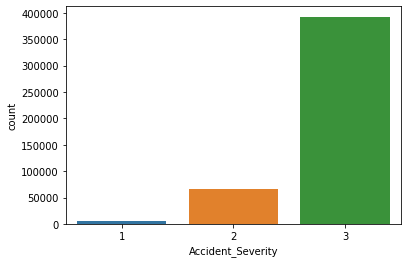

In [10]:
sns.countplot(x ="Accident_Severity" , data = df)
print(100 *df["Accident_Severity"].value_counts()/ len (df))


Longitude ( float64 ): 384094
Accident_Severity ( int64 ): 3
Number_of_Vehicles ( int64 ): 18
Number_of_Casualties ( int64 ): 37
Day_of_Week ( int64 ): 7
Local_Authority_(District) ( int64 ): 380
Local_Authority_(Highway) ( object ): 207
Road_Type ( object ): 6
Speed_limit ( int64 ): 7
Pedestrian_Crossing-Human_Control ( object ): 3
Pedestrian_Crossing-Physical_Facilities ( object ): 6
Light_Conditions ( object ): 5
Weather_Conditions ( object ): 9
Road_Surface_Conditions ( object ): 5
Urban_or_Rural_Area ( int64 ): 2
Did_Police_Officer_Attend_Scene_of_Accident ( object ): 2
Year ( int64 ): 3
   Accident_Severity      Ratio
3             392610  84.487311
2              66784  14.371515
1               5303   1.141174




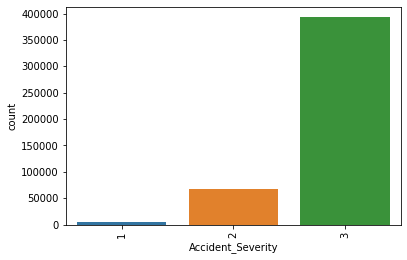

   Day_of_Week      Ratio
6        76054  16.366363
5        70644  15.202164
3        70316  15.131580
4        69835  15.028072
2        66725  14.358819
7        60819  13.087883
1        50304  10.825118




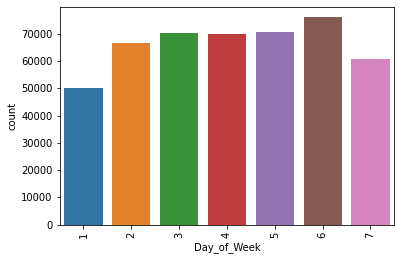

                    Road_Type      Ratio
Single carriageway     351268  75.590761
Dual carriageway        65998  14.202373
Roundabout              31852   6.854359
One way street           9074   1.952670
Slip road                4827   1.038741
Unknown                  1678   0.361096




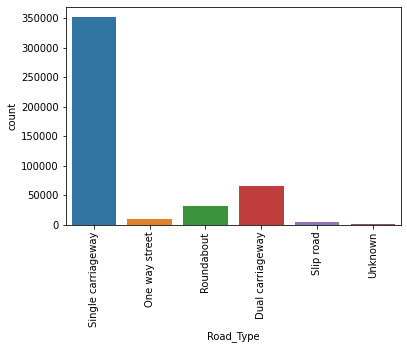

    Speed_limit      Ratio
30       304842  65.600165
60        64465  13.872480
40        37538   8.077952
70        31484   6.775167
50        17312   3.725438
20         9055   1.948582
10            1   0.000215




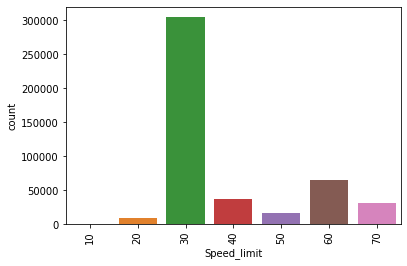

                                    Pedestrian_Crossing-Human_Control  \
None within 50 metres                                          462133   
Control by other authorised person                               1468   
Control by school crossing patrol                                1096   

                                        Ratio  
None within 50 metres               99.448243  
Control by other authorised person   0.315905  
Control by school crossing patrol    0.235853  




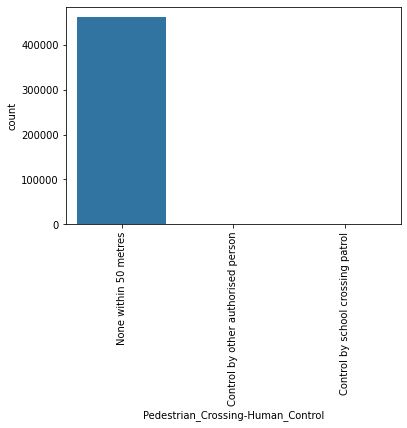

                                             Pedestrian_Crossing-Physical_Facilities  \
No physical crossing within 50 meters                                         377099   
Pedestrian phase at traffic signal junction                                    35165   
non-junction pedestrian crossing                                               26572   
Zebra crossing                                                                 14012   
Central refuge                                                                 10369   
Footbridge or subway                                                            1480   

                                                 Ratio  
No physical crossing within 50 meters        81.149437  
Pedestrian phase at traffic signal junction   7.567297  
non-junction pedestrian crossing              5.718135  
Zebra crossing                                3.015298  
Central refuge                                2.231346  
Footbridge or subway                     

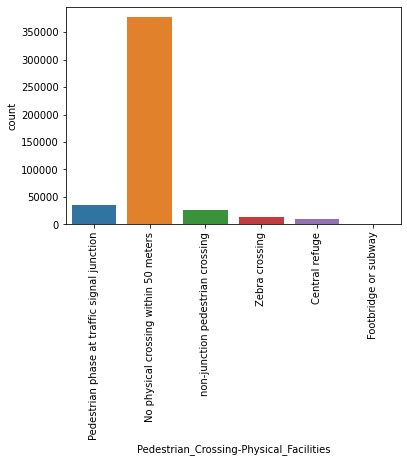

                                           Light_Conditions      Ratio
Daylight: Street light present                       341124  73.407833
Darkness: Street lights present and lit               91158  19.616653
Darkeness: No street lighting                         22999   4.949246
Darkness: Street lighting unknown                      6853   1.474724
Darkness: Street lights present but unlit              2563   0.551542




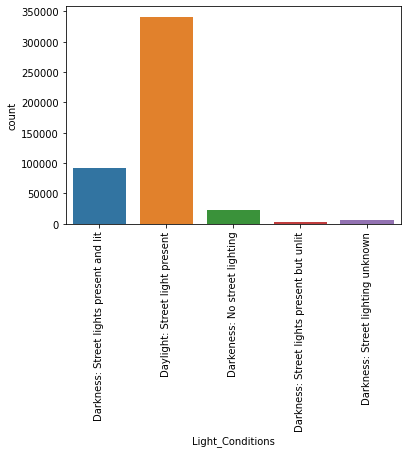

                            Weather_Conditions      Ratio
Fine without high winds                 373167  80.303294
Raining without high winds               57060  12.278969
Other                                     8272   1.780085
Unknown                                   8215   1.767819
Raining with high winds                   7120   1.532181
Fine with high winds                      5011   1.078337
Snowing without high winds                2708   0.582745
Fog or mist                               2411   0.518833
Snowing with high winds                    733   0.157737




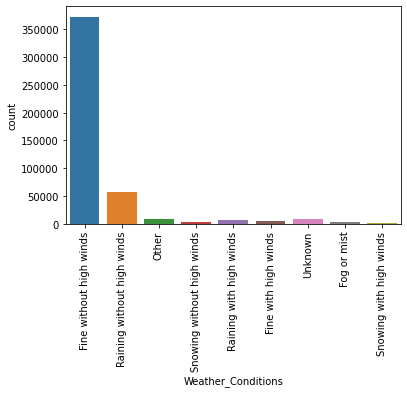

                           Road_Surface_Conditions      Ratio
Dry                                         319370  68.726504
Wet/Damp                                    132745  28.565926
Frost/Ice                                     8140   1.751679
Snow                                          2824   0.607708
Flood (Over 3cm of water)                      863   0.185712




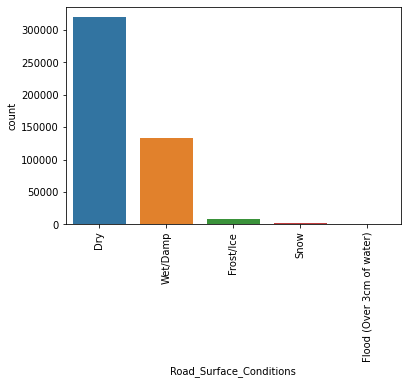

   Urban_or_Rural_Area      Ratio
1               307896  66.257368
2               156801  33.742632




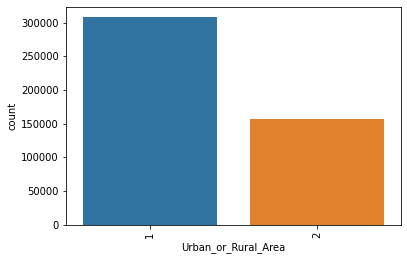

     Did_Police_Officer_Attend_Scene_of_Accident     Ratio
Yes                                       380850  81.95663
No                                         83845  18.04294




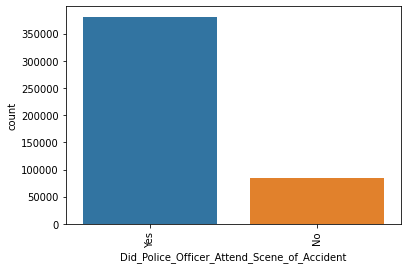

        Year      Ratio
2012  179715  38.673587
2014  146322  31.487615
2013  138660  29.838798




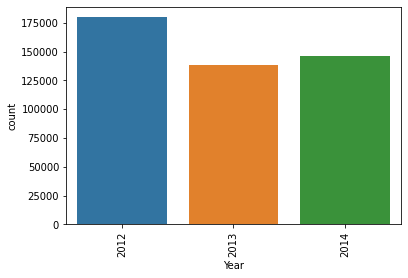

In [11]:
for  i in df.columns:
    print(i, "(",str(df[i].dtypes),"):",df[i].nunique())

    
for col in [col for col in df.columns if len(df[col].unique()) < 10]: #
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Ratio": 100 * df[col].value_counts()/ len (df)}), end = "\n\n\n")
    chart = sns.countplot(x = col, data = df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

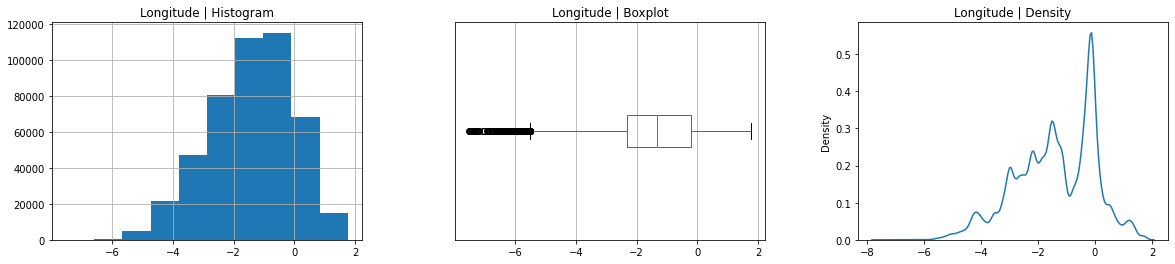

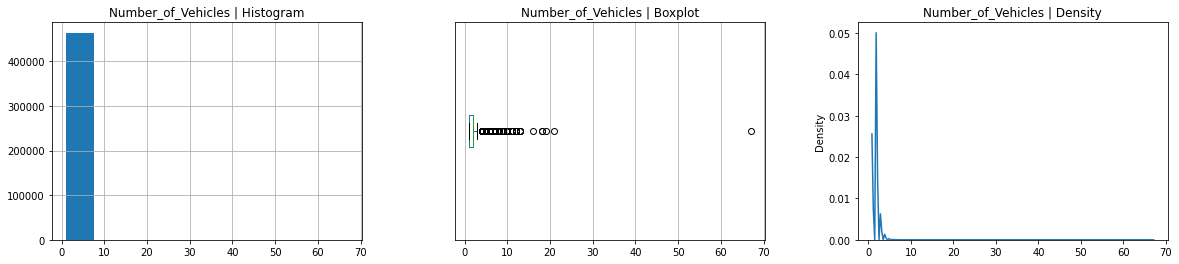

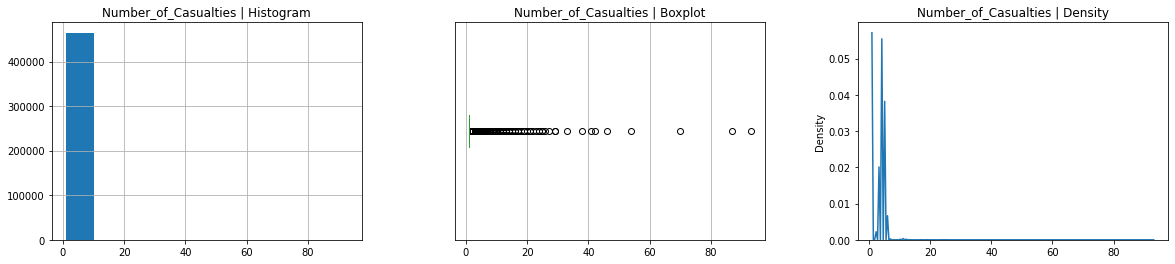

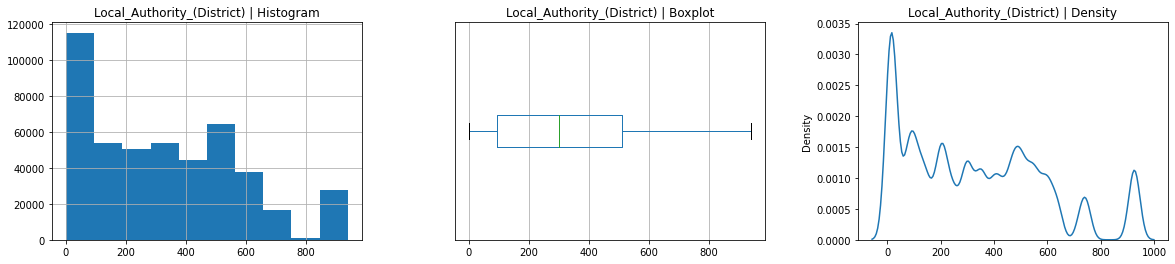

In [12]:

    
num_cols = [col for col in df.columns if df[col].dtypes != object 
                and len(df[col].unique()) >= 10]
    

        
    
for i in num_cols:
    fig, axes = plt.subplots(1, 3, figsize = (20,4))
    df.hist(str(i), bins = 10, ax=axes[0])
    df.boxplot(str(i),  ax=axes[1], vert=False);
    try: 
        sns.kdeplot(np.array(df[str(i)]))
    except: ValueError
        
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Histogram")
    axes[1].set_title(i + " | Boxplot")
    axes[2].set_title(i + " | Density")
    plt.show()
        
        


<Axes: xlabel='Number_of_Vehicles', ylabel='Density'>

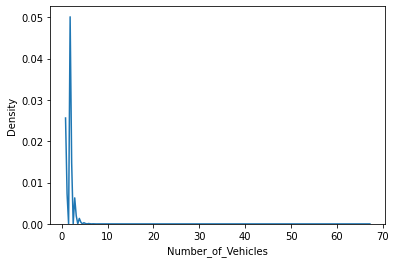

In [13]:
sns.kdeplot(df["Number_of_Vehicles"])

In [14]:
df.corr()

,Longitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Speed_limit,Urban_or_Rural_Area,Year
Longitude,1.000000,0.033144,0.015349,-0.040972,-0.002335,-0.374428,-0.069084,-0.106236,0.028124
Accident_Severity,0.033144,1.000000,0.078750,-0.060358,0.003478,-0.043415,-0.073219,-0.079522,0.006445
Number_of_Vehicles,0.015349,0.078750,1.000000,0.252533,0.003376,-0.001769,0.089665,0.044852,0.005481
Number_of_Casualties,-0.040972,-0.060358,0.252533,1.000000,0.000407,0.019785,0.141020,0.114752,-0.009160
Day_of_Week,-0.002335,0.003478,0.003376,0.000407,1.000000,-0.002014,-0.015876,-0.018107,-0.002890
Local_Authority_(District),-0.374428,-0.043415,-0.001769,0.019785,-0.002014,1.000000,0.212592,0.263910,0.071632
Speed_limit,-0.069084,-0.073219,0.089665,0.141020,-0.015876,0.212592,1.000000,0.680879,0.008236
Urban_or_Rural_Area,-0.106236,-0.079522,0.044852,0.114752,-0.018107,0.263910,0.680879,1.000000,0.017433
Year,0.028124,0.006445,0.005481,-0.009160,-0.002890,0.071632,0.008236,0.017433,1.000000


In [15]:
df=df.dropna()

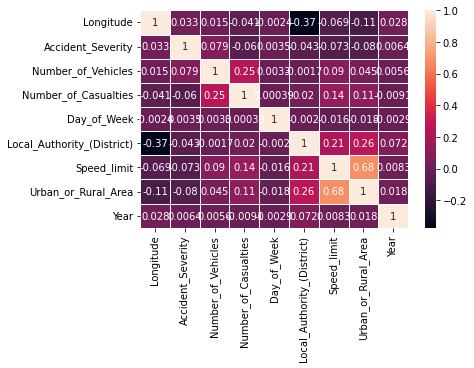

In [16]:
sns.heatmap(df.corr(), annot=True, linewidths=1, xticklabels=True, yticklabels=True);

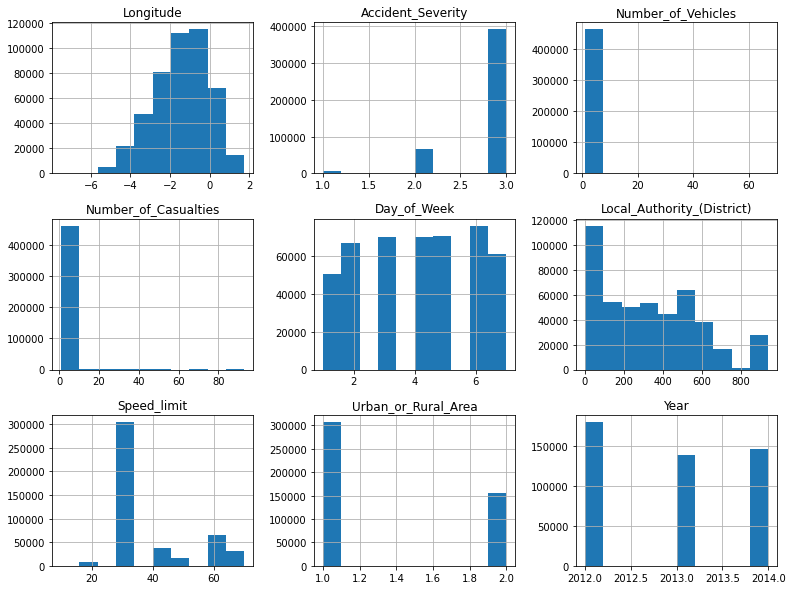

In [17]:
df.hist(figsize = (13,10))
plt.show()

<Axes: xlabel='Accident_Severity', ylabel='Number_of_Vehicles'>

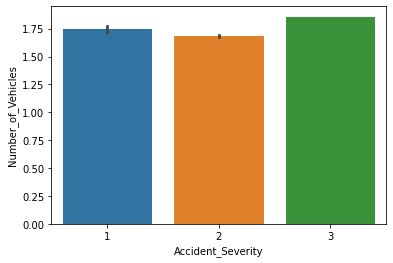

In [71]:
sns.barplot(x= 'Accident_Severity', y='Number_of_Vehicles', data=df)

<Axes: xlabel='Accident_Severity', ylabel='Number_of_Vehicles'>

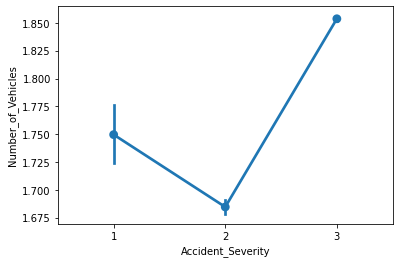

In [20]:
sns.pointplot(x= 'Accident_Severity', y='Number_of_Vehicles', data=df)

<Axes: xlabel='Accident_Severity', ylabel='Speed_limit'>

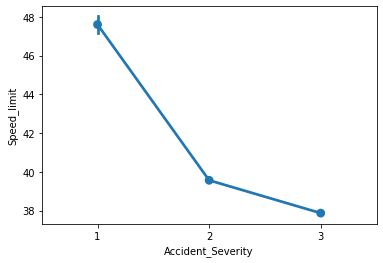

In [26]:
sns.pointplot(x= 'Accident_Severity', y='Speed_limit', data=df)

<Axes: xlabel='Accident_Severity', ylabel='Speed_limit'>

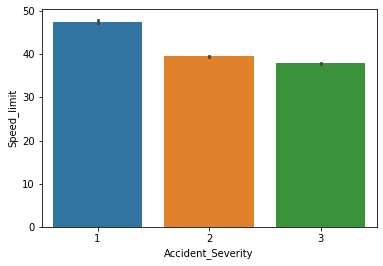

In [27]:
sns.barplot(x= 'Accident_Severity', y='Speed_limit', data=df)

In [28]:
df = df.drop(columns=["Local_Authority_(Highway)"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463941 entries, 0 to 464696
Data columns (total 16 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Longitude                                    463941 non-null  float64
 1   Accident_Severity                            463941 non-null  int64  
 2   Number_of_Vehicles                           463941 non-null  int64  
 3   Number_of_Casualties                         463941 non-null  int64  
 4   Day_of_Week                                  463941 non-null  int64  
 5   Local_Authority_(District)                   463941 non-null  int64  
 6   Road_Type                                    463941 non-null  object 
 7   Speed_limit                                  463941 non-null  int64  
 8   Pedestrian_Crossing-Human_Control            463941 non-null  object 
 9   Pedestrian_Crossing-Physical_Facilities      463941 non-nul

In [30]:
df.head()

,Longitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Road_Type,Speed_limit,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.169101,3,2,1,5,12,Single carriageway,30,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,-0.200838,3,2,1,4,1,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,-0.188636,3,2,1,3,12,One way street,30,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,-0.200259,3,1,1,4,12,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,-0.183773,3,1,1,3,12,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012


In [31]:
df.loc[df.Did_Police_Officer_Attend_Scene_of_Accident == "Yes", "Did_Police_Officer_Attend_Scene_of_Accident"] = 1
df.loc[df.Did_Police_Officer_Attend_Scene_of_Accident == "No", "Did_Police_Officer_Attend_Scene_of_Accident"] = 0

In [32]:
df.head()

,Longitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Road_Type,Speed_limit,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.169101,3,2,1,5,12,Single carriageway,30,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,1,2012
1,-0.200838,3,2,1,4,1,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,1,2012
2,-0.188636,3,2,1,3,12,One way street,30,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,1,2012
3,-0.200259,3,1,1,4,12,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,1,2012
4,-0.183773,3,1,1,3,12,Single carriageway,30,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,1,2012


In [33]:
df2=df.copy()


In [34]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [35]:
df2["Road_Type"] = le.fit_transform(df.Road_Type)
df2["Light_Conditions"] = le.fit_transform(df.Light_Conditions)
df2["Weather_Conditions"] = le.fit_transform(df.Weather_Conditions)
df2["Road_Surface_Conditions"] = le.fit_transform(df.Road_Surface_Conditions)
df2= df2.drop(columns=["Pedestrian_Crossing-Physical_Facilities"])

In [36]:

df2= df2.drop(columns=["Pedestrian_Crossing-Human_Control"])

In [37]:
df2.head()

,Longitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.169101,3,2,1,5,12,3,30,2,1,0,1,1,2012
1,-0.200838,3,2,1,4,1,3,30,2,1,0,1,1,2012
2,-0.188636,3,2,1,3,12,1,30,4,1,0,1,1,2012
3,-0.200259,3,1,1,4,12,3,30,4,1,0,1,1,2012
4,-0.183773,3,1,1,3,12,3,30,2,1,0,1,1,2012


In [38]:
df["Road_Type"].value_counts()

Single carriageway    350680
Dual carriageway       65939
Roundabout             31775
One way street          9056
Slip road               4822
Unknown                 1669
Name: Road_Type, dtype: int64

In [39]:
df2["Road_Type"].value_counts()

3    350680
0     65939
2     31775
1      9056
4      4822
5      1669
Name: Road_Type, dtype: int64

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463941 entries, 0 to 464696
Data columns (total 14 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Longitude                                    463941 non-null  float64
 1   Accident_Severity                            463941 non-null  int64  
 2   Number_of_Vehicles                           463941 non-null  int64  
 3   Number_of_Casualties                         463941 non-null  int64  
 4   Day_of_Week                                  463941 non-null  int64  
 5   Local_Authority_(District)                   463941 non-null  int64  
 6   Road_Type                                    463941 non-null  int32  
 7   Speed_limit                                  463941 non-null  int64  
 8   Light_Conditions                             463941 non-null  int32  
 9   Weather_Conditions                           463941 non-nul

In [41]:
X=df2.drop("Accident_Severity",axis=1)
y=df2["Accident_Severity"]

In [42]:
X = sm.add_constant(X)

In [43]:
X.head()

,const,Longitude,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,1.0,-0.169101,2,1,5,12,3,30,2,1,0,1,1,2012
1,1.0,-0.200838,2,1,4,1,3,30,2,1,0,1,1,2012
2,1.0,-0.188636,2,1,3,12,1,30,4,1,0,1,1,2012
3,1.0,-0.200259,1,1,4,12,3,30,4,1,0,1,1,2012
4,1.0,-0.183773,1,1,3,12,3,30,2,1,0,1,1,2012


In [44]:
df2.shape

(463941, 14)

In [45]:
X.shape

(463941, 14)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 42)

In [48]:
X_train.shape

(324758, 14)

In [49]:
y_train.shape

(324758,)

In [50]:
from sklearn.naive_bayes import GaussianNB 
#bağımlı değişkende 3 tane kategorik değişken olduğu için bunu kullanıyorum 


nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [51]:
y_tahmin=y_pred = nb_model.predict(X_test)

In [52]:
y_tahmin

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [53]:
y_test

75754     3
139501    3
189657    3
249478    3
196662    3
         ..
342667    2
97856     2
258642    3
32234     3
430744    3
Name: Accident_Severity, Length: 139183, dtype: int64

In [54]:
testdf= pd.DataFrame({"Kaza_siddeti":y_test, "tahmin_edilmis_kaza_siddeti":y_tahmin})
testdf

,Kaza_siddeti,tahmin_edilmis_kaza_siddeti
75754,3,3
139501,3,3
189657,3,3
249478,3,3
196662,3,3
...,...,...
342667,2,3
97856,2,1
258642,3,3
32234,3,3


In [55]:
nb_model.predict_proba(X_test)[0:10]

array([[2.90592653e-20, 9.16664421e-03, 9.90833356e-01],
       [3.75580817e-02, 2.47882268e-01, 7.14559650e-01],
       [3.46000114e-03, 1.39422354e-01, 8.57117645e-01],
       [7.03895112e-03, 1.16668647e-01, 8.76292402e-01],
       [3.05581736e-03, 1.07985867e-01, 8.88958316e-01],
       [6.34860168e-03, 1.42646899e-01, 8.51004499e-01],
       [9.61354060e-04, 4.99969455e-02, 9.49041700e-01],
       [7.95806271e-03, 1.87398621e-01, 8.04643316e-01],
       [2.85013788e-03, 1.05044879e-01, 8.92104984e-01],
       [6.76526433e-02, 9.58795616e-02, 8.36467795e-01]])

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [57]:
accuracy_score(y_test, y_tahmin) # doğruluk 
#yaptığımız modelde yüzde 79 ihtimalle kaza şiddetini tahmin edebiliriz. 


0.7938828736268079

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [59]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()

#çapraz doğrulama skoru

0.7997744215730697